**Imports & Settings**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)


**Load Processed Dataset**

In [ ]:
df = pd.read_csv("/content/master_dataset.csv")

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Industry code             176 non-null    float64
 1   sector                    208 non-null    object 
 2   year                      208 non-null    int64  
 3   sector_output             208 non-null    float64
 4   rgdpo                     208 non-null    float64
 5   emp                       208 non-null    float64
 6   rkna                      208 non-null    float64
 7   avh                       208 non-null    float64
 8   gdp_per_worker            208 non-null    float64
 9   capital_per_worker        208 non-null    float64
 10  output_per_worker         208 non-null    float64
 11  output_per_hour           208 non-null    float64
 12  sector_output_growth      207 non-null    float64
 13  output_per_worker_growth  207 non-null    float64
 14  output_per

**Basic Coverage Checks**

In [ ]:
print("Years covered:", df["year"].min(), "-", df["year"].max())
print("Number of sectors:", df["sector"].nunique())
df["sector"].value_counts().head()

Years covered: 2005 - 2012
Number of sectors: 26


,count
sector,
Basic metals,8
Chemicals and chemical products,8
"Coke, refined petroleum products and nuclear fuel",8
Electrical machinery and apparatus n.e.c.,8
Electricity,8


Aggregate Productivity Trends (CORE MACRO VIEW)
**Output per worker vs hour**

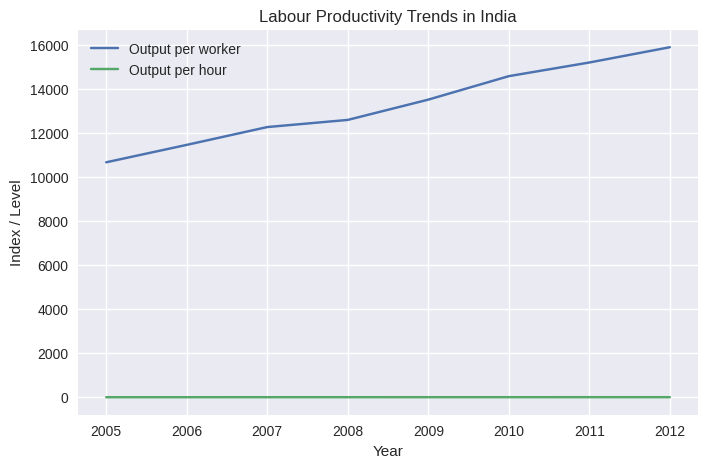

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df.groupby("year")["output_per_worker"].mean(), label="Output per worker")
plt.plot(df.groupby("year")["output_per_hour"].mean(), label="Output per hour")
plt.title("Labour Productivity Trends in India")
plt.xlabel("Year")
plt.ylabel("Index / Level")
plt.legend()
plt.show()

**Productivity Growth Dynamics**

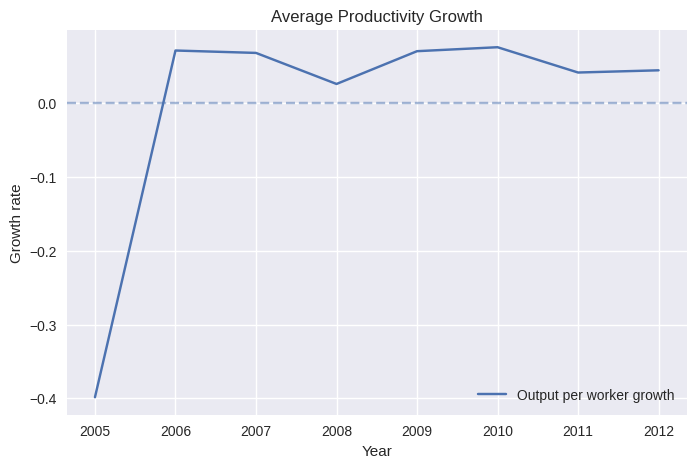

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(
    df.groupby("year")["output_per_worker_growth"].mean(),
    label="Output per worker growth"
)
plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("Average Productivity Growth")
plt.xlabel("Year")
plt.ylabel("Growth rate")
plt.legend()
plt.show()

** Major Sector Output Levels (STRUCTURAL VIEW)**

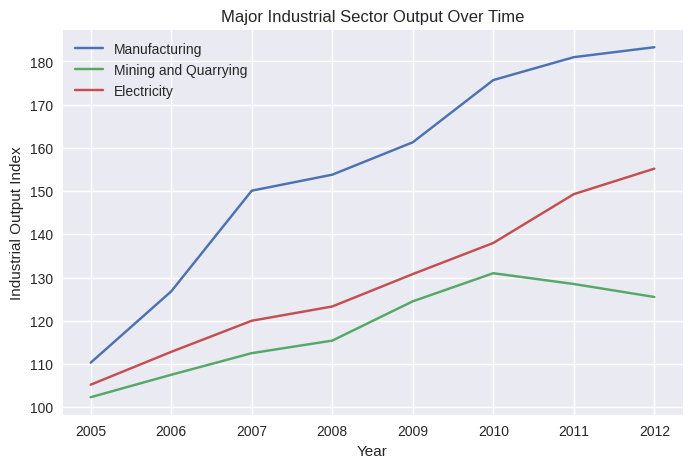

In [ ]:
major_sectors = [
    "Manufacturing",
    "Mining and Quarrying",
    "Electricity"
]

plt.figure(figsize=(8,5))
for sec in major_sectors:
    s = df[df["sector"] == sec]
    plt.plot(s["year"], s["sector_output"], label=sec)

plt.title("Major Industrial Sector Output Over Time")
plt.xlabel("Year")
plt.ylabel("Industrial Output Index")
plt.legend()
plt.show()

**Sectoral Output Growth (CYCLICAL VIEW)**

In [ ]:
volatility = (
    df.groupby("sector")["sector_output_growth"]
      .std()
      .sort_values(ascending=False)
)

top_sectors = volatility.head(6).index.tolist()
top_sectors

['Rubber and plastics products',
 'Electricity',
 'Electrical machinery and apparatus n.e.c.',
 'Radio, TV and communication equipment and apparatus',
 'Paper and paper products',
 'Manufacturing']

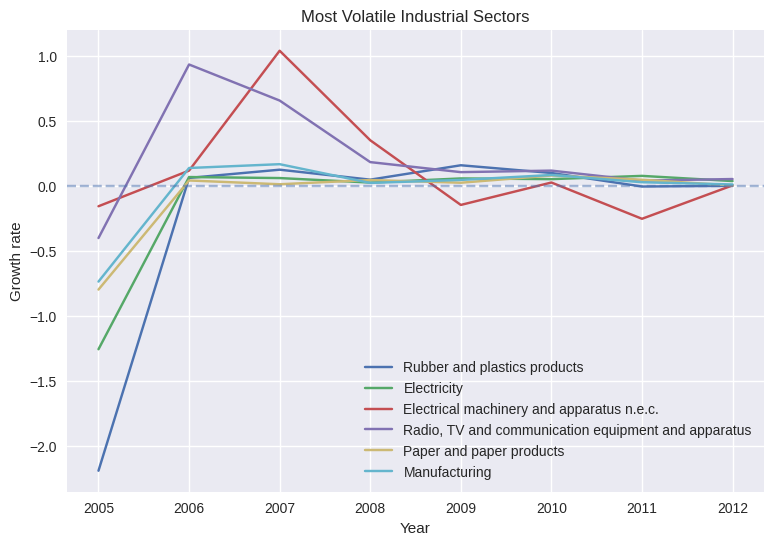

In [ ]:
plt.figure(figsize=(9,6))
for sec in top_sectors:
    s = df[df["sector"] == sec]
    plt.plot(s["year"], s["sector_output_growth"], label=sec)

plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("Most Volatile Industrial Sectors")
plt.xlabel("Year")
plt.ylabel("Growth rate")
plt.legend()
plt.show()

In [ ]:
import os

# Create the output directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)
volatility.to_csv('outputs/sector_volatility.csv')

**Productivity vs Sector Growth (RELATIONSHIP VIEW**)

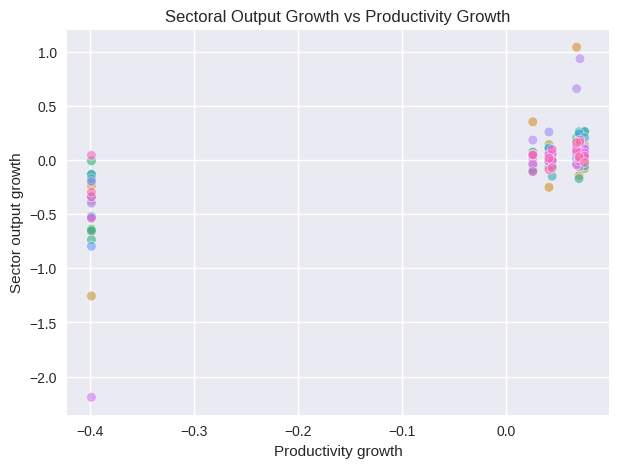

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="output_per_worker_growth",
    y="sector_output_growth",
    hue="sector",
    alpha=0.6,
    legend=False  # important to avoid clutter
)
plt.title("Sectoral Output Growth vs Productivity Growth")
plt.xlabel("Productivity growth")
plt.ylabel("Sector output growth")
plt.show()

**Correlation Snapshot**

In [ ]:
corr = df[
    ["output_per_worker_growth",
     "output_per_hour_growth",
     "sector_output_growth"]
].corr()

corr

,output_per_worker_growth,output_per_hour_growth,sector_output_growth
output_per_worker_growth,1.000000,0.999543,0.665806
output_per_hour_growth,0.999543,1.000000,0.668430
sector_output_growth,0.665806,0.668430,1.000000
